# Understanding Bayesian Networks
### Part A: Designing the Bayesian Network
In this notebook we demonstrate a Credit Card Fraud Detection System by creating a Bayesian Network using the Pomegranate module.

In [17]:
# Importing the libraries
import networkx as nx               # For Graphical Representation of Bayesian Network
import matplotlib.pyplot as plt
from pomegranate.distributions import Categorical, ConditionalCategorical
from pomegranate.bayesian_network import BayesianNetwork

In [18]:
# Define the distributions for each random variable
travel = Categorical([[0.05, 0.95]])                            # P(Travel)

foreign_purchase = ConditionalCategorical([[[0.88, 0.12],       # P(Foreign Purchase | Travel = True)
                                            [0.0001, 0.9999]]]) # P(Foreign Purchase | Travel = False)

owns_device = Categorical([[0.7, 0.3]])                         # P(Owns Device)

online_purchase = ConditionalCategorical([[[0.4, 0.6],          # P(Online Purchase | Owns Device = True)
                                           [0.05, 0.95]]])      # P(Online Purchase | Owns Device = False)

fraud = ConditionalCategorical([[[0.995, 0.005],                # P(Fraud | Travel = True, Online Purchase = True)
                                 [0.85, 0.15],                  # P(Fraud | Travel = True, Online Purchase = False)
                                 [0.8, 0.2],                    # P(Fraud | Travel = False, Online Purchase = True)
                                 [0.75,0.25]]])                 # P(Fraud | Travel = False, Online Purchase = False)

In [19]:
# Create the Bayesian Network
fraud_detection_model = BayesianNetwork()

# Add the distributions to the model
fraud_detection_model.add_distributions([travel, foreign_purchase, owns_device, online_purchase, fraud])

# Add the edges to the model
fraud_detection_model.add_edge(travel, foreign_purchase)
fraud_detection_model.add_edge(owns_device, online_purchase)
fraud_detection_model.add_edge(travel, fraud)
fraud_detection_model.add_edge(online_purchase, fraud)

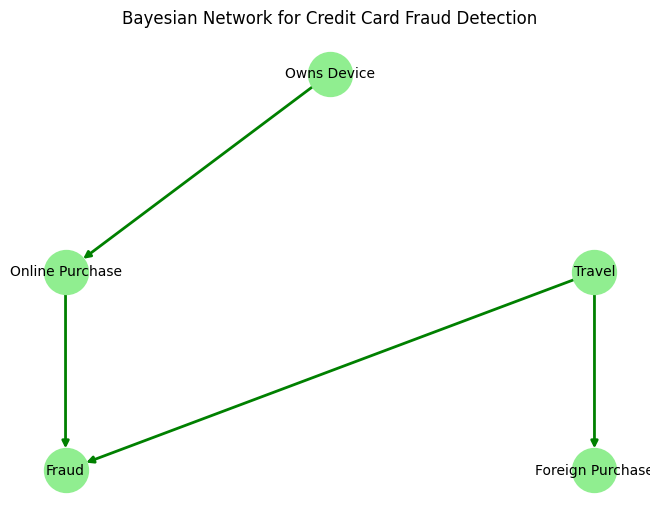

In [20]:
# Define the Bayesian network structure as a dictionary
# Each key is a random variable and value is level of node in the graph followed by the parent nodes
network = {
    "Travel": [1, []],
    "Foreign Purchase": [2, ["Travel"]],
    "Owns Device": [0, []],
    "Online Purchase": [1, ["Owns Device"]],
    "Fraud": [2, ["Travel", "Online Purchase"]]
}

# Convert the Bayesian network to a NetworkX graph
graph = nx.DiGraph()

# Get max level of network
max_level = max([node[0] for node in network.values()])

# Add nodes to the graph and corresponding edges
for node, [level, parents] in network.items():
    graph.add_node(node, level=max_level-level)
    for parent in parents:
        graph.add_edge(parent, node)

# Draw the graph using NetworkX
pos = nx.multipartite_layout(graph, subset_key="level", align='horizontal')
nx.draw(graph, pos, with_labels=True, node_size=1000, node_color='lightgreen', font_size=10, width=2, edge_color='green')
plt.title('Bayesian Network for Credit Card Fraud Detection')
plt.show()